<a href="https://colab.research.google.com/github/sarindesai/notebooks/blob/main/desicion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [52]:
#import some data to play with
iris=pd.read_csv('https://raw.githubusercontent.com/slmsshk/DataSet/main/iris.csv')

In [53]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
iris['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [55]:
#complete Iris dataset
label_encoder=preprocessing.LabelEncoder()
iris['Species']=label_encoder.fit_transform(iris['Species'])

In [56]:
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [57]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [58]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [59]:
colnames=list(iris.columns)
colnames

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [60]:
#splitting data training and testing data set
#from sklearn.model_selection imoprt train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=40)

In [61]:
x_train

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
62,6.0,2.2,4.0,1.0
23,5.1,3.3,1.7,0.5
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
2,4.7,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1
50,7.0,3.2,4.7,1.4
7,5.0,3.4,1.5,0.2


In [62]:
y_train

62    1
23    0
26    0
48    0
2     0
     ..
71    1
12    0
50    1
7     0
70    1
Name: Species, Length: 120, dtype: int64

Building Decision Tree Classifier using Entropy Criteria

In [63]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.375, 0.875, 'X[2] <= 2.45\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(0.25, 0.375, 'X[2] <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(0.125, 0.125, 'entropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

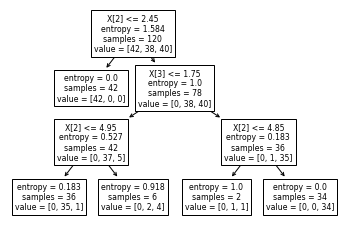

In [64]:
#plot the decision tree
from sklearn import tree
tree.plot_tree(model)

In [65]:
y_train.value_counts().keys()

Int64Index([0, 2, 1], dtype='int64')

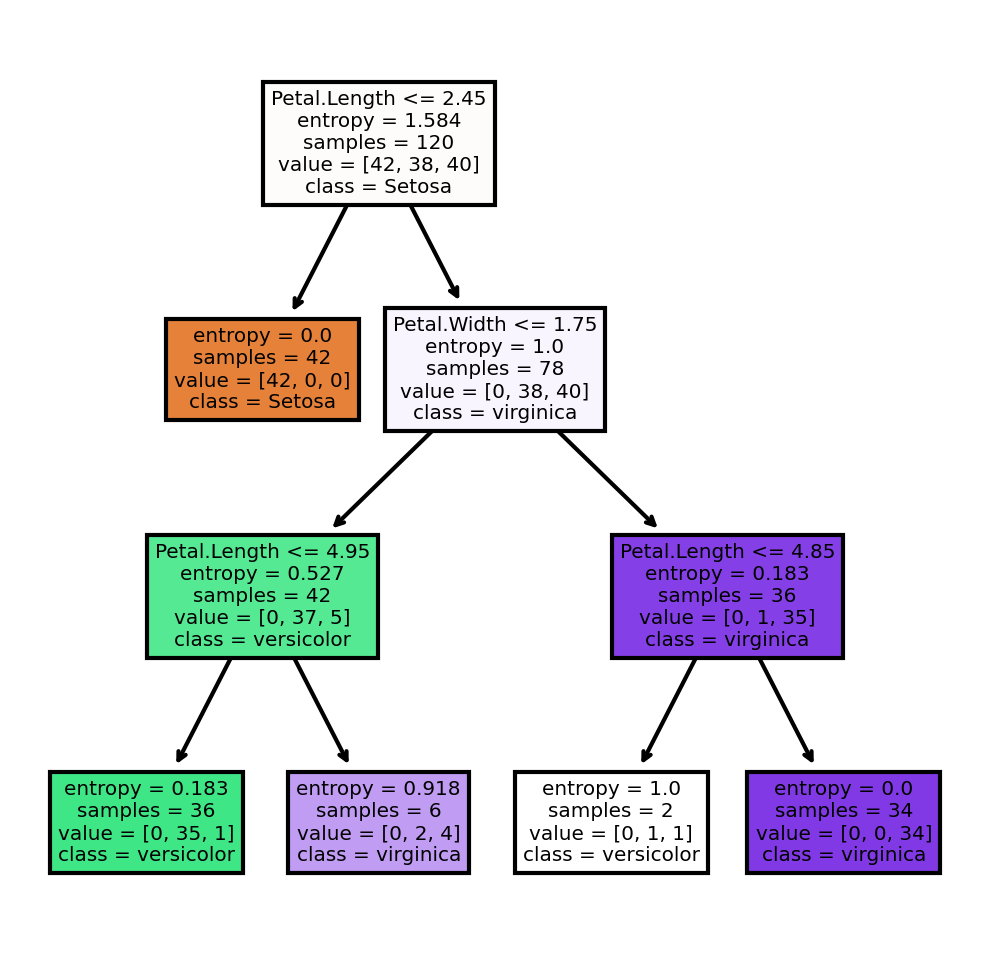

In [66]:
fn=iris.columns#['sepal length(cm)','sepal width(cm),petal length(cm),petal width(cm),']#columns
cn=['Setosa','versicolor','virginica']#.value_count.keys
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,
               feature_names=fn,
               class_names=cn,
               filled=True);

In [67]:
#predicting on test data
preds=model.predict(x_test)#predicting on test data set
pd.Series(preds).value_counts()#getting the count of each category

1    13
2     9
0     8
dtype: int64

In [68]:
y_test.value_counts()

1    12
2    10
0     8
Name: Species, dtype: int64

In [69]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [70]:
pd.crosstab(y_test,preds)#getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [71]:
#Accuracy
np.mean(preds==y_test)

0.9666666666666667

In [72]:
y_test[127:]

Series([], Name: Species, dtype: int64)

Building Decision Tree Classifier(CART) using Gini Criteria


In [73]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [74]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [75]:
#prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9666666666666667

Decision Tree Regression Example

In [76]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [77]:
array=iris.values
X=array[:,0:3]
Y=array[:,3]

In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=1)

In [79]:
model=DecisionTreeRegressor()

In [80]:
model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [81]:
#find the Accuracy
model.score(X_test,Y_test)

0.8570506663465002